# Calvin Forinash - Raw Data and Analysis #

In this notebook, I create my DataFrame and perform some basic analysis of crime reporting numbers to find the "safest" neighborhoods in Pittsburgh. Obviously, crime reports are simply not enough to say that a neighborhood is safe, since I won't be looking at what the offenses were. Some offenses are bound to be minor, while some will be pretty major crimes; these would both be worth the same value in this analysis. However, combined with Ola and Matthew's analyses and their metrics, I believe that crime statistics should help determine which neighborhoods would be good to live in. 

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("ctf16_crime_data.csv")
data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


Below, I will analyze this data and put together a list of the top 10 safest neighborhoods in Pittsburgh based on these crime statistics. 

In [5]:
data['INCIDENTNEIGHBORHOOD']

0                         North Shore
1                 Upper Lawrenceville
2                   Northview Heights
3         Golden Triangle/Civic Arena
4                   Northview Heights
                     ...             
239500                       Sheraden
239501                      Brookline
239502                    South Shore
239503              Northview Heights
239504                      Allentown
Name: INCIDENTNEIGHBORHOOD, Length: 239505, dtype: object

The next data is for Central and South Oakland, just for fun. It's relatively safe, but by no means on the low end of crime statistics. Since 2016 there have been 1692 UCR reports in South Oakland. Central Oakland has seen 4033 reports, I assume mostly because of stupid college students getting in trouble. 

In [25]:
#data['INCIDENTNEIGHBORHOOD'].count()
southO = data.loc[data['INCIDENTNEIGHBORHOOD'] == 'South Oakland']
centralO = data.loc[data['INCIDENTNEIGHBORHOOD'] == 'Central Oakland']

centralO

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
56,2801506,16000227.0,24,2016-01-01T04:16:00,"Meyran AV & Forbes AV Pittsburgh, PA 15213",Y,Central Oakland,4,DISORDERLY CONDUCT,5503 Disorderly Conduct. / 7728 Accidents and ...,405.0,3.0,3.0,-79.958317,40.440579
58,2801508,16000233.0,14,2016-01-01T04:30:00,"400 Block Oakland AV Pittsburgh, PA 15213",N,Central Oakland,4,CRIMINAL MISCHIEF,3502 Burglary.,406.0,3.0,3.0,-79.953489,40.438644
285,2801273,16001601.0,5,2016-01-03T19:30:00,"300 Block Mc Kee PL Pittsburgh, PA 15213",N,Central Oakland,4,BURGLARY/NO FORCE/RES,3502 Burglary.,405.0,3.0,3.0,-79.957719,40.438309
375,2801891,16002190.0,99,2016-01-04T19:06:00,"S Bouquet ST & Forbes AV Pittsburgh, PA 15213",N,Central Oakland,4,NaN,3743 Accidents Involving Damage to Attended Ve...,405.0,3.0,3.0,-79.956438,40.441949
395,2801958,16002318.0,3,2016-01-04T23:45:00,"300 Block Oakland AV Pittsburgh, PA 15213",N,Central Oakland,4,ROBBERY/HIGHWAY/GUN,3701 Robbery.,405.0,3.0,3.0,-79.954990,40.439887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239217,3218869,21051191.0,99,2021-03-26T20:35:00,"Oakland AV & 5th AV Pittsburgh, PA 15213",N,Central Oakland,4,NaN,3745 Accidents Involving Damage to Unattended ...,405.0,3.0,3.0,-79.957857,40.442219
239314,3219021,21052151.0,23,2021-03-28T04:19:00,"300 Block Semple ST Pittsburgh, PA 15213",Y,Central Oakland,4,PUBLIC DRUNKENESS,5505 Public Drunkenness / 5506 Loitering and P...,405.0,3.0,3.0,-79.957092,40.438809
239336,3219051,21051348.0,99,2021-03-27T01:35:00,"Forbes AV & Oakland AV Pittsburgh, PA 15213",N,Central Oakland,4,NaN,3745 Accidents Involving Damage to Unattended ...,405.0,3.0,3.0,-79.956974,40.441572
239425,3219216,21052873.0,6,2021-03-29T12:30:00,"10 Block Oakland SQ Pittsburgh, PA 15213",N,Central Oakland,4,THEFT BICYCLES,3921 Theft by Unlawful Taking or Disposition.,406.0,3.0,3.0,-79.951709,40.437411


In [22]:
sorted_data = data['INCIDENTNEIGHBORHOOD'].value_counts()
sorted_data.head(15)

South Side Flats               13972
Central Business District      12146
Carrick                         8455
Bloomfield                      6563
Shadyside                       6249
East Liberty                    5658
Squirrel Hill South             5436
Homewood South                  5359
Mount Washington                5228
Brookline                       5226
Lincoln-Lemington-Belmar        4831
Knoxville                       4713
Homewood North                  4537
Brighton Heights                4526
Golden Triangle/Civic Arena     4278
Name: INCIDENTNEIGHBORHOOD, dtype: int64

## Least safe neighborhoods ##
Based on this data, the 3 neighborhoods with the most UCR (Uniform Crime Reporting) reports are South Side Flats, the Central Business District and Carrick. 
1. **South Side Flats** - 13972
* This neighborhood sits on the south bank of the Monongahela River, almost directly south of the University of           Pittsburgh. It includes landmarks such as the Color Park and walking trails along the river. The neighborhood is also     centered around E Carson St, which has over 40 bars and pubs; this could be a contributing factor to high crime           reports. 

2. **Central Business District (aka Downtown)** - 12146
* Downtown sits between the Monongahela and Allegheny Rivers. Home to bars, skyscrapers, malls, good food and sports arenas, it is unsurprising that the business center of a historically industrial city is also home to high crime rates. This could also be due simply to the huge amount of traffic, both vehicular and pedestrian, that the neighborhood attracts; more people will eventually lead to more crime. Downtown is often colloquially referred to as The Golden Triangle, which is included separately and has the 15th most UCR reports with 4278. Including this in the Central Business District's tally makes it the neighborhood with the most reports with 16,424, over 3,000 more than any other neighborhood.

3. **Carrick** - 8455
* Everything after South Side Flats and Downtown has significantly fewer crime reports——at least 3700 fewer over the last 5 years. However, Carrick reported almost 2000 more crimes than the next highest, Bloomfield. Carrick sits on the South Side of Pittsburgh. As a densely packed neighborhood in an industrial city, it makes sense that it is a crime hotspot. Based on a quick Google search for "Carrick Pittsburgh" that immediately turned up articles from a few days ago (4/11) about a home invasion in which two men were assaulted. 

However, I want to find the *safest* neighborhoods. There are a handful of neighborhoods with fewer than 600 reports over the last 5+ years (this dataset spans from 2016-present), meaning that they generally get under 100 reports every year. The list below lists the 20 neighborhoods that have officially reported the fewest crimes since 2016. 

In [26]:
reverse_sorted_data = data['INCIDENTNEIGHBORHOOD'].value_counts().iloc[::-1]
reverse_sorted_data.head(25)

Mt. Oliver Boro             72
Mt. Oliver Neighborhood    117
Outside County             154
Outside State              218
Chartiers City             222
New Homestead              248
Ridgemont                  248
Troy Hill-Herrs Island     252
Swisshelm Park             318
East Carnegie              333
Arlington Heights          367
Mount Oliver               377
Summer Hill                394
Hays                       401
Regent Square              408
Oakwood                    439
Esplen                     454
Glen Hazel                 516
Fairywood                  558
St. Clair                  584
Windgap                    604
Spring Garden              679
Polish Hill                737
Duquesne Heights           783
Central Northside          786
Name: INCIDENTNEIGHBORHOOD, dtype: int64

## Safest Neighborhoods by the numbers ##
Based on this data, the 5 safest (actual) neighborhoods are Mount Oliver, Chartiers, New Homestead, Ridgemont and Troy Hill/Herrs Island. I will only go in depth into the top 3 lowest crime neighborhoods. 

1. **Mount Oliver** - 189
* Mount Oliver is, coincidentally, directly north of Carrick. Although the neighborhood of Mt Oliver is  distinct from Mt Oliver Borough, I am considering them as one neighborhood (that technically isn't part of the city of Pittsburgh). It is a relatively high-end residential neighborhood. According to Wikipedia, the average household size is 2.36, which indicates that its residents are largely couples or single parents, with the occasional large family or person living alone. 

2. **Chartiers** - 222
* Chartiers is a small neighborhood in the northwest corner of Pittsburgh. With a land area of a mere 84 acres (0.132 sq. miles) and population of less than 500, the crime rate per capita is relatively high. I won't include this neighborhood on the final top 10 list I compile. 

3. **New Homestead** - 248
* Mostly encompassing wooded areas, New homestead has a population of about 1000 residents in an area of .794 sq miles (again, I won't include this in the final list). 

4. **Ridgemont** - 248

5. **Troy Hill/Herrs Island** - 252

## Let's Talk About Mount Oliver ##

In [37]:
mtoliver = data.loc[data['INCIDENTNEIGHBORHOOD'] == 'Mt. Oliver Boro']
mtoliver.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
4933,2811938,16029663.0,14,2016-02-18T07:50:00,"300 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,CRIMINAL MISCHIEF,3304 Criminal Mischief.,4810.0,3.0,4.0,-79.988359,40.414290
5608,2812987,16033854.0,11,2016-02-24T12:00:00,"400 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,THEFT OF SERVICES,9999 Miscellaneous Report (No Crime),4810.0,3.0,4.0,-79.989126,40.413245
7408,2817610,16044545.0,99,2016-03-12T04:30:00,"Liberty TUN & E Warrington AV Pittsburgh, PA 1...",N,Mt. Oliver Boro,3,NaN,3743 Accidents Involving Damage to Attended Ve...,4810.0,NaN,NaN,0.000000,0.000000
9578,2825111,16061606.0,99,2016-04-01T07:00:00,"200 Block ANTHONY ST PITTSBURGH, PA 15210",N,Mt. Oliver Boro,3,NaN,9999 (Misc. Crime),4810.0,NaN,NaN,-79.986476,40.412247
14915,2831789,16090396.0,10,2016-05-17T14:05:00,"700 Block Brownsville RD Pittsburgh, PA 15210",N,Mt. Oliver Boro,3,HARRASSMENT/THREAT/ATTEMPT/PHY,"2709(a)(1) Harassment by Physical Contact, or ...",4810.0,3.0,4.0,-79.990902,40.409848


Looking at the offenses column, most of the crimes committed in Mt Oliver are relatively minor, with a couple exceptions, notably the terroristic threats

## Final List - Safest Neighborhoods ##

Below is the final top 20 list of the safest neighborhoods. I won't go into detail on every one so that I can put together as long and comprehensive a list as possible to make the combination of metrics with my groupmates easier.
  (*Keep in mind, safest is subjective here, and I included and omitted some neighborhoods based on population or other factors that I felt discounted their statistics*)

#### 1. Mount Oliver ####
* Based on my analysis, Mount Oliver is my pick for the safest neighborhood in Pittsburgh. It only had 189 UCR reports since 2016, while having a reasonable population of about 4000 residents. 

#### 2. Chartiers ####

#### 3. New Homestead ####

#### 4. Ridgemont ####

#### 5. Troy Hill/Herrs Island ####

#### 6. Swisshelm Park ####

#### 7. East Carnegie ####

#### 8. Arlington Heights ####

#### 9. Summer Hill ####

#### 10. Hays ####

#### 11. Regent Square ####

#### 12. Oakwood ####

#### 13. Esplen ####

#### 14. Glen Hazel ####

#### 15. Fairywood ###

#### 16. Windgap ####

#### 17. Spring Garden ####

#### 18. Polish Hill ####

#### 19. Duquesne Heights ####

#### 20. Central Northside ####

# The Best Neighborhood in Pittsburgh #

In [3]:
import pandas as pd
import numpy as np
import geopandas

#### Importing the dataset and seeing what data it contains ####

In [4]:
#importing calvin's data
 
crime = pd.read_csv("ctf16_crime_data.csv")
crime

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239500,3219314,21052759.0,5,2021-03-29T09:10:00,"600 Block Sherwood AV Pittsburgh, PA 15204",N,Sheraden,6,BURGLARY/FORCE ENT/RES,3502 Burglary.,2018.0,2.0,5.0,-80.053715,40.455355
239501,3219315,21052763.0,26,2021-03-29T08:05:00,"Blaine ST Pittsburgh, PA 15226",N,Brookline,6,HARRASSMENT-OTHER,2709(a)(2) Harassment by Following Person in P...,1919.0,1.0,1.0,-79.990330,40.465804
239502,3219317,21052767.0,99,2021-03-29T08:10:00,"W Carson ST & S Main ST Pittsburgh, PA 15219",N,South Shore,6,NaN,3743 Accidents Involving Damage to Attended Ve...,1921.0,NaN,NaN,0.000000,0.000000
239503,3219318,21052779.0,99,2021-03-26T11:24:00,"1400 Block Chicago ST Pittsburgh, PA 15214",N,Northview Heights,1,NaN,9129 Miscellaneous Investigation,2609.0,NaN,NaN,0.000000,0.000000


#### That's a lot of unnecessary data, so let's drop what we won't need. ####

In [5]:
#drop the unnecessary data (most of it)

condensedcrime = crime.drop(columns=
                            ['PK','CCR',
                             'HIERARCHY',
                             'INCIDENTTIME',
                             'CLEAREDFLAG',
                             'INCIDENTZONE',
                             'INCIDENTTRACT',
                             'COUNCIL_DISTRICT',
                             'PUBLIC_WORKS_DIVISION'])
condensedcrime

,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,X,Y
0,"400 Block North Shore DR Pittsburgh, PA 15212",North Shore,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,-80.012337,40.446263
1,"5400 Block Carnegie ST Pittsburgh, PA 15201",Upper Lawrenceville,THEFT BY DECEPTION,3922 Theft by Deception.,-79.950295,40.482290
2,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,-80.000966,40.478651
3,"300 Block Wood ST Pittsburgh, PA 15222",Golden Triangle/Civic Arena,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,-80.001251,40.438918
4,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,-80.000966,40.478651
...,...,...,...,...,...,...
239500,"600 Block Sherwood AV Pittsburgh, PA 15204",Sheraden,BURGLARY/FORCE ENT/RES,3502 Burglary.,-80.053715,40.455355
239501,"Blaine ST Pittsburgh, PA 15226",Brookline,HARRASSMENT-OTHER,2709(a)(2) Harassment by Following Person in P...,-79.990330,40.465804
239502,"W Carson ST & S Main ST Pittsburgh, PA 15219",South Shore,NaN,3743 Accidents Involving Damage to Attended Ve...,0.000000,0.000000
239503,"1400 Block Chicago ST Pittsburgh, PA 15214",Northview Heights,NaN,9129 Miscellaneous Investigation,0.000000,0.000000


#### Let's assemble some lists based on offense counts ####

First off, the top 5 neighborhoods with the most crime

In [34]:
byneighborhood = condensedcrime.drop(columns=['INCIDENTHIERARCHYDESC','OFFENSES','X','Y'])
df = byneighborhood.groupby('INCIDENTNEIGHBORHOOD').count()
neighborhoodcounts = df.sort_values(by=['INCIDENTLOCATION'])
countsreversed = neighborhoodcounts.iloc[::-1]

#most crime neighborhoods
countsreversed.head(5)

,INCIDENTLOCATION
INCIDENTNEIGHBORHOOD,
South Side Flats,13972
Central Business District,12146
Carrick,8455
Bloomfield,6563
Shadyside,6249


Now, the 15 lowest crime neighborhoods

In [90]:
#least crime neighborhoods
neighborhoodcounts.head(15)

,INCIDENTLOCATION
INCIDENTNEIGHBORHOOD,
Mt. Oliver Boro,72
Mt. Oliver Neighborhood,117
Outside County,154
Outside State,218
Chartiers City,222
Ridgemont,248
New Homestead,248
Troy Hill-Herrs Island,252
Swisshelm Park,318


As you can see, Mt Oliver is included three times on this list. Although Mt Oliver Borough is separate from the neighborhood, as it's technically not a part of the city and has its own government, I will combine the three instances of Mt Oliver for simplicity's sake. In the next part, I gathered population data (from as recently as I could find) to be able to somewhat normalize the numbers per capita. 

Based on this data, the top 10 safest neighborhoods are:
1. **Chartiers** - 222, pop=477
2. **Ridgemont** - 248, pop=483
3. **New Homestead** - 248, pop=990
4. **Troy Hill/Herrs Island** - 252, pop=2714
5. **Swisshelm Park** - 318, pop=1361
6. **East Carnegie** - 333, pop=2661
7. **Arlington Heights** - 367, pop=244
8. **Summer Hill** - 394, pop=1051
9. **Hays** - 401, pop=362
10. **Regent Square** - 408, pop=928

#### Time to map it out ####

<AxesSubplot:>

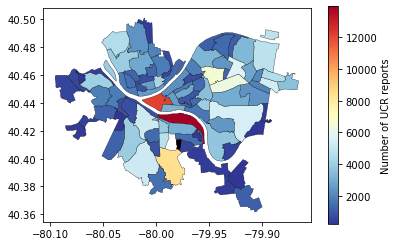

In [124]:
#mapping things

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#neighborhoods.plot()

crimemap_sorted = neighborhoods.merge(neighborhoodcounts, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
#crimemap[['hood','INCIDENTLOCATION',"geometry"]].head()
crimemap_sorted.plot(column='INCIDENTLOCATION',
              cmap="RdYlBu_r",
              edgecolor="black",
              linewidth=.3,
              legend=True,
              legend_kwds={'label': 'Number of UCR reports'},
              missing_kwds={'color':'black'})


The map above shows the neighborhoods with the most crime reports in dark red and the neighborhoods with the fewest crime reports in dark blue. As the map shows, most neighborhoods have very little crime relative to the highest crime neighborhoods like Downtown and South Side Flats. However, most of the safer neighborhoods are located in northwest and northern Pittsburgh. 

## Safest Neighborhood ##

Based on my metric and semi-subjective analysis, the safest neighborhood in Pittsburgh is Troy Hill/Herrs Island. It has the fourth lowest number of reported crimes——252——since 2016 while having the largest population (2714) of any neighborhood in the top 15 by a large margin except over East Carnegie, with a population of 2661. This puts their crimes per capita at a measly 0.09 over more than five years, meaning that since 2016, there has been roughly one crime committed per 54 residents every year (0.1857 crimes per capita each year over a 5 year span). 